# K-Nearest Neighbors

#### Jessica Morrise

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split

These functions find the $k$ closest known data points to a new sample $x$. This is called the _$k$-neighboorhood_. The points in the $k$-neighborhood vote on a label for $x$.

In [3]:
def k_neighborhood(x, data, labels,  k):
    # data is a NumPy array of data, N x p
    # N is the number of datapoints, p is the number of features
    # labels is the labels of the data
    dists = np.linalg.norm(data - x, axis=1)
    k_idx = np.argsort(dists)[:k]
    return data[k_idx], labels[k_idx]

In [4]:
def label_sample(x, data, labels, k):
    # assume the labels are integers starting at 0
    neighbors, k_labels = k_neighborhood(x, data, labels, k)
    counts = np.bincount(k_labels)
    i = np.argmax(counts)
    return i

This class implements a simple K-Nearest Neighbors classifier.

In [5]:
class KNN(object):
    
    def __init__(self):
        pass
    
    def k_neighborhood(self, x, k):
        # data is a NumPy array of data, N x p
        # N is the number of datapoints, p is the number of features
        # labels is the labels of the data
        dists = np.linalg.norm(self.data - x, axis=1)
        k_idx = np.argsort(dists)[:k]
        return self.data[k_idx], self.labels[k_idx]
    
    def train(self,data, labels):
        self.data = data
        self.labels = labels
        
    def classify(self,sample,k):
        # assume the labels are integers starting at 0
        neighbors, k_labels = self.k_neighborhood(sample, k)
        counts = np.bincount(k_labels)
        j = np.argmax(counts)
        return j
    
    def classify_many(self,samples,k,true_labels=None):
        N = samples.shape[0]
        predicted_labels = np.zeros((N))
        for i in xrange(N):
            predicted_labels[i] = self.classify(samples[i],k)
        if true_labels is None:
            accuracy = None
        else:
            accuracy = np.sum(np.equal(predicted_labels,true_labels))/float(N)
        return predicted_labels, accuracy  

### The Iris Data

The Iris data set is a classic classification data set. The data set consists of measurements of flower specimens. There are 4 features and 3 classes.

In [12]:
iris = load_iris()
iris_data = iris.data
iris_labels = iris.target
print iris_data[:7]
iris_train_data,iris_test_data,iris_train_labels,iris_test_labels = train_test_split(iris_data,iris_labels,test_size=0.3)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]]


With $k = 5$, training on 70% of the data, our KNN classifier achieves 95.6% accuracy.

In [7]:
model = KNN()
model.train(iris_train_data, iris_train_labels)
predicted_labels, accuracy = model.classify_many(iris_test_data,5,iris_test_labels)

In [8]:
print "Accuracy:",accuracy

Accuracy: 0.955555555556


To determine an optimal value for $k$, we run our classifier on a range of $k$ values from 1 to 100. Accuracy is good until about $k = 30$. At this point, the $k$ closest points are not actually very close anymore, and the votes of dissimilar points start to outweight the votes of similar ones.

In [27]:
A = []
k_max = 100
for k in xrange(1,k_max+1):
    predicted_labels, accuracy = model.classify_many(iris_test_data,k,iris_test_labels)
    A.append(accuracy)

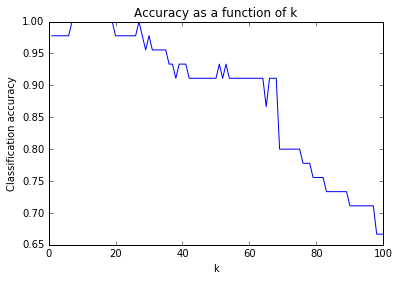

In [28]:
plt.plot(np.arange(1,k_max+1),A)
plt.title('Accuracy as a function of k')
plt.xlabel('k')
plt.ylabel('Classification accuracy')
plt.show()